<H1> Classification avec le jeu de données TITANIC </H1>

L'objectif est de poursuivre le TP précédente où de nombreux prétraitements ont été effecutés en ingénierie des données pour pouvoir faire un modèle de prédiction des survivants ou non.


## **Installation**



Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.

In [164]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install ..

# ne pas oublier de relancer le kernel du notebook

In [165]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Pour pouvoir lire et sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [166]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire google drive :

In [167]:
my_local_drive='/content/gdrive/My Drive'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive


'/content/gdrive/My Drive'

## **Travaux pratiques**

Si vous n'avez pas terminé le TP précédent vous pouvez récupérer le fichier titanic2.csv qui contient les différentes transformations. Le mettre dans le répertoire Dataset.

In [168]:
df=pd.read_csv('Dataset/titanic2.csv', sep=';')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,4,1,0,0,2
1,1,1,0,0,1,0,3,0
2,1,3,0,6,0,0,0,2
3,1,1,0,6,1,0,3,2
4,0,3,1,6,0,0,1,2


Il faut maintenant définir les variables d'apprentissage et la variable à prédire. Ici Suvived est la variable à prédire.
Attention elle est positionné à la première colonne.

In [169]:
array = df.values
X = array[:,1:8]
y = array[:,0]


Découper le jeu de données en jeu de test et jeu d'apprentissage. Prenez 30% du jeu de données pour le test.

In [170]:
trainsize=0.7
testsize= 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=trainsize,test_size=testsize)

**Essai d'un classifieur**  

Avec le classifieur GaussianNB effectuer une première prédiction en donnant la valeur de l'accuracy.

In [171]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('\n accuracy : %0.3f'%(accuracy_score(y_pred, y_test)),'\n')


 accuracy : 0.660 



Afficher la matrice de confusion et le classification report.


 matrice de confusion 
 [[26  9]
 [ 7  5]]


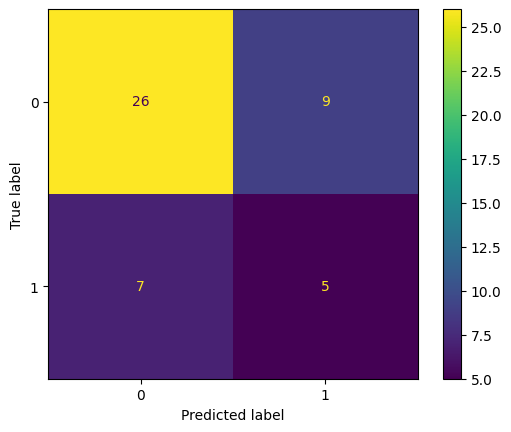

In [172]:
conf = confusion_matrix(y_test, y_pred)
print ('\n matrice de confusion \n',conf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=clf.classes_)
disp.plot()

In [173]:
print ('\n',classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.36      0.42      0.38        12

    accuracy                           0.66        47
   macro avg       0.57      0.58      0.57        47
weighted avg       0.68      0.66      0.67        47





Effectuer une cross validation avec 10 splits (Kfold)

In [174]:
k_fold = KFold(n_splits=10, shuffle=True)

Appliquer le classifieur GaussianNB et donner les différentes accuracy pour les 10 évaluations.

In [175]:
score = cross_val_score(clf, X, y, cv=k_fold, scoring='accuracy')

print('Les différentes accuracy pour les 10 évaluations sont : \n',
      score,'\n')
print ('Accuracy moyenne : %0.3f'%(score.mean()))

Les différentes accuracy pour les 10 évaluations sont : 
 [0.8125     0.8125     0.75       0.75       0.8125     0.86666667
 0.73333333 0.8        0.73333333 0.86666667] 

Accuracy moyenne : 0.794


**Essai de plusieurs classifieurs**

Utiliser à présent différents classifieurs : KNeighborsClassifier, DecisionTreeClassifier, GaussianNB, SVC et RandomForestClassifier.

In [176]:
clf_gaussNB = GaussianNB()
clf_gaussNB.fit(X_train, y_train)

clf_Kneigh = KNeighborsClassifier()
clf_Kneigh.fit(X_train, y_train)

clf_decis = DecisionTreeClassifier()
clf_decis.fit(X_train, y_train)

clf_svc = SVC()
clf_svc.fit(X_train, y_train)

clf_randfo = RandomForestClassifier()
clf_randfo.fit(X_train, y_train)

RandomForestClassifier()

Quels sont les résultats des classifications ? Quel est le classifieur le plus efficace ?

In [177]:
score_gaussNB = cross_val_score(clf_gaussNB, X, y, cv=KFold(n_splits=15, shuffle=True), scoring='accuracy')
print ('Accuracy moyenne gaussNB : %0.3f'%(score_gaussNB.mean()))

score_Kneigh = cross_val_score(clf_Kneigh, X, y, cv=KFold(n_splits=15, shuffle=True), scoring='accuracy')
print ('Accuracy moyenne Kneigh : %0.3f'%(score_Kneigh.mean()))

score_decis = cross_val_score(clf_decis, X, y, cv=KFold(n_splits=15, shuffle=True), scoring='accuracy')
print ('Accuracy moyenne decis : %0.3f'%(score_decis.mean()))

score_svc = cross_val_score(clf_svc, X, y, cv=KFold(n_splits=15, shuffle=True), scoring='accuracy')
print ('Accuracy moyenne svc : %0.3f'%(score_svc.mean()))

score_randfo = cross_val_score(clf_randfo, X, y, cv=KFold(n_splits=15, shuffle=True), scoring='accuracy')
print ('Accuracy moyenne randfo : %0.3f'%(score_randfo.mean()))

Accuracy moyenne gaussNB : 0.779
Accuracy moyenne Kneigh : 0.673
Accuracy moyenne decis : 0.723
Accuracy moyenne svc : 0.743
Accuracy moyenne randfo : 0.779


A l'aide de boxplot afficher les résultats des différents classifieurs.

<Axes: >

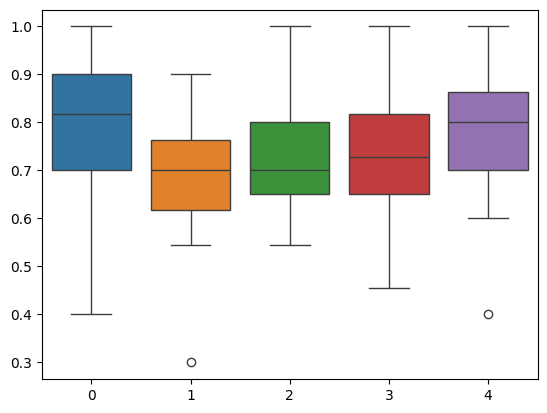

In [178]:
scores = [
    score_gaussNB,
    score_Kneigh,
    score_decis,
    score_svc,
    score_randfo
]

sns.boxplot(scores)

Le classifieur RandomForestClassifier donne de meilleurs résultats. A l'aide de GridSearch, évaluer les différents paramètres :  
  grid_param = {'n_estimators': [4, 6, 9],   
     'max_features': ['log2', 'sqrt','auto'],   
     'criterion': ['entropy', 'gini'],  
     'max_depth': [2, 3, 5, 10],   
     'min_samples_split': [2, 3, 5],  
     'min_samples_leaf': [1,5,8]  
      }  

In [185]:
grid_param = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
}

gd_rf = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1,return_train_score=True)
gd_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9]},
             return_train_score=True, scoring='accuracy')

Quelle est la meilleure accuracy et pour quels paramètres ?

In [191]:
print ('meilleur score %0.3f'%(gd_rf.best_score_),'\n')
print ('meilleurs paramètres RandomForestClassifier', gd_rf.best_params_,'\n')

meilleur score 0.843 

meilleurs paramètres RandomForestClassifier {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 4} 



GaussianNB obtient un assez bon score mais il n'a pas d'hyperparamètres à rechercher. Il est suivi par DecisisionTreeClassifier et SVC.   

Appliquer GridSearchCV pour ces deux classifieurs.

In [189]:
grid_param = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
}

gd_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1,return_train_score=True)
gd_dt.fit(X_train, y_train)

print ('meilleur score DecisisionTreeClassifier %0.3f'%(gd_rf.best_score_),'\n')
print ('meilleurs paramètres DecisisionTreeClassifier', gd_rf.best_params_,'\n')

meilleur score DecisisionTreeClassifier 0.843 

meilleurs paramètres DecisisionTreeClassifier {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 4} 



In [190]:
grid_param = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma' : [0.001, 0.01, 0.1, 1],
    'kernel': ['linear','rbf']}

gd_svc = GridSearchCV(estimator=SVC(),param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1,return_train_score=True)
gd_svc.fit(X_train, y_train)

print ('meilleur score SVC %0.3f'%(gd_svc.best_score_),'\n')
print ('meilleurs paramètres SVC', gd_svc.best_params_,'\n')

meilleur score SVC 0.815 

meilleurs paramètres SVC {'C': 1, 'gamma': 0.001, 'kernel': 'linear'} 



Vous constatez que RandomForestClassifier et DecisionTreeClassifier peuvent avoir la même accuracy.  
Faire un gridsearch avec les deux classifieurs en prenant les paramètres précédents.

In [226]:
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params = {
    'RandomForestClassifier' : [
        {'n_estimators': [4,6,9]},
        {'max_features': ['log2','sqrt','auto']},
        {'criterion': ['entropy','gini']},
        {'max_depth': [2, 3, 5, 10]},
        {'min_samples_split': [2, 3, 5]},
        {'min_samples_leaf': [1,5,8]}],
    'DecisionTreeClassifier': [
        {'max_depth': [1,2,3,4,5,6,7,8,9,10]},
        {'criterion': ['gini', 'entropy']},
        {'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}]
}

class Result_Parameters:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))


results = []
for key,value in classifiers.items():
    gd_rf_dt = GridSearchCV(estimator=value,
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1)
    gd_rf_dt.fit(X_train, y_train)
    result=Result_Parameters(key,gd_rf_dt.best_score_,gd_rf_dt.best_estimator_)
    results.append(result)

results=sorted(results, key=lambda result: result.score, reverse=True)

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name,
       ' score %0.3f' %results[0].score,
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name,
           ' score %0.3f' %result.score,
           ' avec ',result.parameters,'\n')

Le meilleur resultat : 

Classifier :  DecisionTreeClassifier  score 0.825  avec  DecisionTreeClassifier(max_depth=1) 

Tous les résultats : 

Classifier :  DecisionTreeClassifier  score 0.825  avec  DecisionTreeClassifier(max_depth=1) 

Classifier :  RandomForestClassifier  score 0.796  avec  RandomForestClassifier(max_depth=2) 



**Conclusion ** : il faut toujours faire attention aux paramètres passés dans un classifieur. Ils peuvent tout changer !

**Sauvegarde du modèle**

Sauvegarder le meilleur modèle appris et recharger le pour le tester avec y_test.

In [233]:
# la ligne suivante considère que le résultat est stocké dans la variable gd_sr
clf=results[0].parameters

import pickle
filename = 'pkl_Titanicbestmodel.sav'
pickle.dump(clf, open(filename, 'wb'))

In [231]:
def cpt_mal_classes(y_test,result):
    nb=0
    for i in range(len(y_test)):
        if y_test[i] != result [i]:
            nb=nb+1
    return nb

def print_nb_classes (taille,nb):
    print ("Taille des données à tester",
       taille,
       " - mal classées : ",nb)

In [234]:
print ("Chargement du modèle \n")
filename = 'pkl_Titanicbestmodel.sav'
clf_loaded = pickle.load(open(filename, 'rb'))

y_pred=clf_loaded.predict(X_test)

nb=cpt_mal_classes(y_test,y_pred)
taille=len(y_test)
print_nb_classes (len(y_test),nb)

Chargement du modèle 

Taille des données à tester 47  - mal classées :  11
